In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# ==================================== #
#  Constants
# ==================================== #

e = 1.602e-19                           #charge of a electron, C / electron volt, J
epsilon0 = 8.854e-12                    #vaccum dielectric constant, F/m
me = 9.109e-31                          #mass of a electron , kg
h = 6.626e-34                           #Planck constant, J*s 
hbar = h/(2*np.pi)
NA = 6.022e23
kb = 1.38e-23                            # Boltzmann constant, J/K
aB = 4*np.pi*epsilon0*hbar**2 / (me*e**2)# Bohr radius, m
Ry = 13.6                                # Ryberg, eV

cal2J = 4.184 
# ==================================== #
#  Metal Units <---> S.I. Units
# ==================================== #

J2eV = 6.2442e18
m2A = 1e10
gmol2g = 1/NA
kg2gmol = 1e3/gmol2g
s2ps = 1e12
s2fs = 1e15

cm2m = 1e-2
gcc2kgm3 = 1e-3/(cm2m**3)

bar2Pa = 1e5
kbar2GPa = 1e3*bar2Pa/1e9
Pa2GPa = 1e-9

kg2g=1e3
m2cm=1e2
mJ2J = 1e-3        

nm2A = 10

# ==================================== #
#  Atomic Units <---> Metal/S.I. Units
# ==================================== #

m2bohr = 1/aB
A2bohr = m2bohr/m2A
eV2Ry = 1/Ry

# ==================================== #
#  PHONON
# ==================================== #

c = 3*10**8                               # speed of light, m/s
omega2k = s2ps*1/(c) *cm2m                # 1/ps -> 1/cm

unit_trans = 1/ NA * (1 / m2cm * m2A) **3 
vpa2rho = (24.3050 + 15.9994) / NA / (1/m2A**3) / (m2cm**3)


from scipy.optimize import curve_fit

comp_dir = '/data/home/djy4/jupyter/MgO/EOS/OSF/compare/'

# kappa data from DPMD calculations

format of data

temp [K]

pressure [GPa]

density [gcc]

thermal conductivity [W/mK]

errorbar of thermal conducivity [W/mK]


In [2]:
# ====================
# PBEsol functional (p,rho,kappa) b1
# ====================

kappa_300k = np.array([
       [300., 300., ],
       [0.4, 14, ],
       [3.54154154, 3.83583584, ],
       [60.33436476239333 ,95.395553261695   ],
       [7.204797336250823,12.133404383342574,]]) 

kappa_2kk = np.array([
       [ 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.],
       [10,20,30,40, 50, 100, 200, 300, 400, 500],
       [ 3.52752753, 3.73073073, 3.90590591, 4.06706707,
       4.20720721, 4.7957958 , 5.63663664, 6.27427427, 6.7997998 ,
       7.26226226],
       [6.765048066693334 ,10.461626017870001,12.457138026238331,14.243757513884999,17.999787126188668,36.62854729228267 ,69.35657958305734 ,98.27332622624266 ,129.89468462254334 ,155.76683677551583 ],
       [0.612031819761114,0.9931988522565502,1.1649619182020499,1.410254165584864,1.5183560092000763,2.9688730772534355,4.556136713494715,8.518463599358885,12.753557458569674, 15.906425718335903 ]])

kappa_4kk = np.array([
   [4000., 4000., 4000., 4000., 4000.],
   [100, 200, 300, 400, 500],
   [4.66266266, 5.53153153, 6.17617618, 6.71571572, 7.18518519],               
   [ 11.488658247568   ,23.951826283826666,36.785489816235334,46.228033202535336,58.35046371722667 ],
   [ 1.0566219116845053,1.9681023046912625,3.149060732972281,3.599254237676721,4.704461471489108]])

kappa_6kk = np.array([
       [6000., 6000., 6000., 6000., 6000.],
       [100, 200, 300, 400, 500],
       [4.51551552, 5.41241241, 6.08508509, 6.63863864, 7.10810811],
       [5.151648240104667 ,12.498287844828667,18.497239687792664,24.748800654683333,30.148921084568666],
       [0.42557481205499537,1.1835173804704164,1.3722904518275638,1.8395000927187686,2.2988502391753207]])
#
data_b1 = np.hstack([kappa_300k, kappa_2kk, kappa_4kk, kappa_6kk])

# ====================
# PBEsol functional (p,rho,kappa) b2
# ====================

k_b2_2kk = np.array([
    [2000., 2000., 2000., 2000., 2000.],
    [400, 450, 500, 550, 600],
    [7.08708709, 7.33933934, 7.57757758, 7.8018018 , 8.01201201],
    [30.88044341496417 ,33.249161427085   ,40.87283534875667 ,45.632996684185834,53.94943040201583 ],
    [2.603268034697101,3.0817767750417064,4.642592667428634,4.579160135394465,5.724020264324473 ]
])
k_b2_4kk = np.array([
    [4000., 4000., 4000., 4000., 4000.],
    [400, 450, 500, 550, 600],
    [6.96796797, 7.22722723, 7.47247247, 7.7037037 , 7.92092092],
    [ 13.184301523621667,15.326978639503334,17.525154735414166,19.231844526176666,22.4001204442475 ],
    [1.1346463504580502,1.5725303772485963,1.7049659460253856,1.9264686574404413,2.3544829828716574]
])
k_b2_6kk = np.array([
    [6000., 6000., 6000., 6000., 6000.],
    [400, 450, 500, 550, 600],
    [6.85585586, 7.12212212, 7.36736737, 7.5985986 , 7.82282282],
    [ 8.419335743545833 ,10.018198514006668,9.865929928875834 ,12.3350610574925  ,13.117145521300833],    
    [0.9365480656016626,0.9797371501007014,0.9087442950116846,1.0741314542321314,1.3802354512279684]
])

data_b2 = np.hstack([k_b2_2kk, k_b2_4kk, k_b2_6kk])


# plot kappa

## press fit to interpolate kappa data


$$\kappa_0 (p)^g (\frac{T_0}{T})^\beta $$

$$ g= b \log(p) +c$$

In [3]:
def prac_formula(X,  beta, c, b):
    pres, temp = X
    T0 = 300
    kappa0 = 55.2

    g = b * np.log( pres ) + c
    
    return kappa0 * pow( pres, g) * pow(T0 / temp, beta)

def prac_formula_b2(X, beta, c, b):
    pres, temp = X
    T0 = 2000
    kappa0 =30.88044341496417 # 55.2
    p0 = 400
    
    g = b * np.log( pres ) + c
    
    return kappa0 * pow( pres, g) * pow(T0 / temp, beta)

p_est, err_est = curve_fit(prac_formula, 
                        xdata=(data_b1[1], data_b1[0]), 
                        ydata=data_b1[3], maxfev=5000)

p_est2, err_est2 = curve_fit(prac_formula_b2, 
                        xdata=(data_b2[1], data_b2[0]), 
                        ydata=data_b2[3], maxfev=5000)


## geotherm with errorbar

- condition of CMB (T = 4100 K, p = 136 GPa)

stackhouse2010: 20 +- 5 W/mk

Kwon2020 : 33.3/42.8/23.2 

our results : 14.83 (+200 K) <- 15.81 W/mK -> 21.12 (-800 K)


Text(0, 0.5, '$\\kappa\\ {\\rm (Wm^{-1}K^{-1})}$')

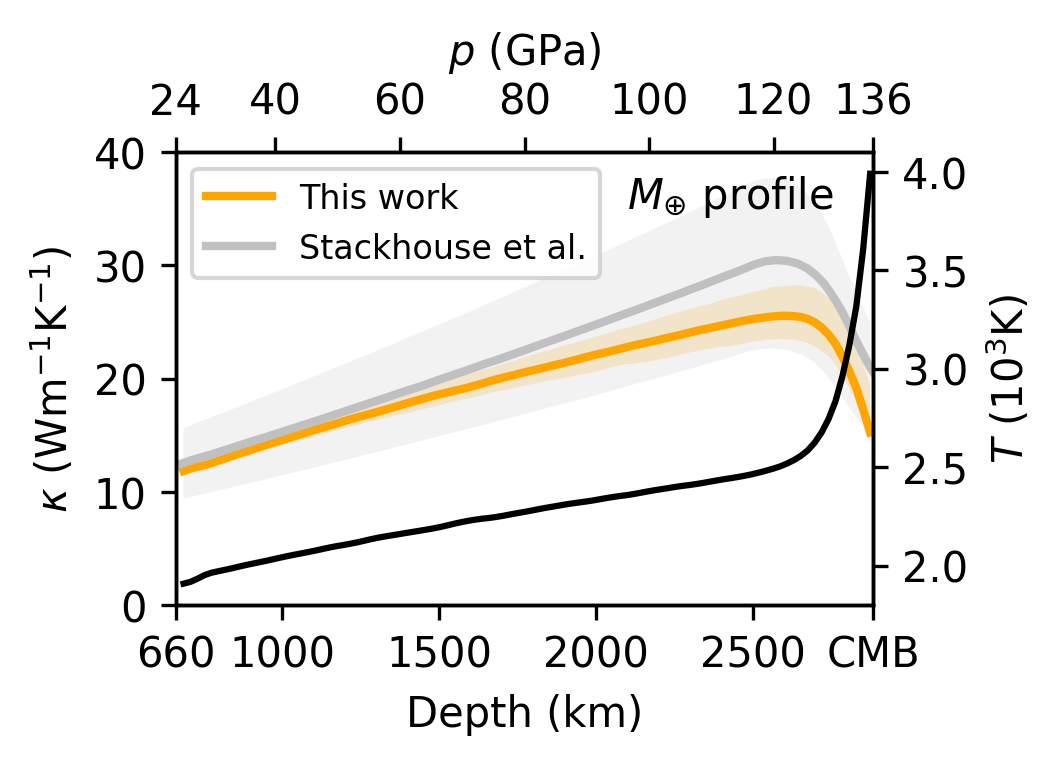

In [4]:
from scipy import interpolate

def _obtain_uniform(data, x):
    f = interpolate.interp1d(data[:,0],data[:,1],kind='slinear')
    return f(x)

def comp_plot():
    
    data = np.loadtxt(comp_dir + 'kappa_depth_stackhouse.txt')
    
    ax.plot(data[:,0], data[:,1], lw=2.0, color='silver', label='Stackhouse et al.')#$\kappa_{LDA, NEMD}$')

    depth =  np.linspace(685, 2875, 100)
    kappa_b   =  _obtain_uniform(np.loadtxt(comp_dir + 'kappa_depth_stackhouse_b.txt'), depth)
    kappa_t   =  _obtain_uniform(np.loadtxt(comp_dir + 'kappa_depth_stackhouse_u.txt'), depth)

    ax.fill_between( depth, kappa_b, kappa_t,
               facecolor='silver',  alpha=0.2,)
    
R = 6371

depth =  np.linspace(685, 2875, 100)

p_depth   =  _obtain_uniform(np.loadtxt(comp_dir + 'geotherm_pres_slb07.txt'), depth)
t_depth   =  _obtain_uniform(np.loadtxt(comp_dir + 'geotherm_temp_slb07.txt'), depth)
t_depth_t =  _obtain_uniform(np.loadtxt(comp_dir + 'geotherm_temp_slb07_t.txt'), depth)
t_depth_b =  _obtain_uniform(np.loadtxt(comp_dir + 'geotherm_temp_slb07_b.txt'), depth)

kappa_depth_b1 = prac_formula((p_depth, t_depth),*p_est)
kappa_depth_b1_t = prac_formula((p_depth, t_depth_t),*p_est)
kappa_depth_b1_b = prac_formula((p_depth, t_depth_b),*p_est)
#kappa_depth_b2 = prac_formula_b2((p_depth, t_depth),*p_est2)

fig, ax = plt.subplots(figsize=(3,2),dpi=300)

ax.plot( depth, kappa_depth_b1, color='orange', 
         lw=2.0, label='This work')#$\kappa_{PBEsol, GK}$')

ax.fill_between( depth, kappa_depth_b1_b, kappa_depth_b1_t, 
               facecolor='orange',  alpha=0.2,)

ax.text(2100, 35, '$M_{\oplus}$ profile')

comp_plot()

scale = 1e-3

ax1 = ax.twinx()
ax1.plot( depth, t_depth * scale, '-k' )
ax1.set_ylabel('$T$ ($10^3\\rm{K}$)')
ax1.set_ylim(1800*scale, 4100*scale)

ax2 = ax1.twiny()
#ax2.plot( p_depth, t_depth, '-k' )
ax2.set_xlim(24, 136)
ax2.set_xticks([24, 40, 60, 80, 100, 120,  136])
ax2.set_xlabel('$p$ (GPa)')


ax.set_xlim(660, 2885)
ax.set_ylim(0, 40)
ax.set_xticks([660, 1000, 1500, 2000, 2500, 2885])
ax.set_xticklabels([660, 1000, 1500, 2000, 2500, 'CMB'])

# xx = np.linspace(2685, 2885, 100)
# y1 = np.ones(xx.shape)*0
# y2 = np.ones(xx.shape)*5
# ax.fill_between(xx, y1, y2, color='silver', )
#ax.axvline(2650, linestyle=':', color='k')

ax.legend(loc=2, fontsize=8)
ax.set_xlabel('Depth (km)') #$R_{\oplus}$
ax.set_ylabel('$\kappa\ {\\rm (Wm^{-1}K^{-1})}$')

## 5M earth

Text(0, 0.5, '$\\kappa\\ {\\rm (Wm^{-1}K^{-1})}$')

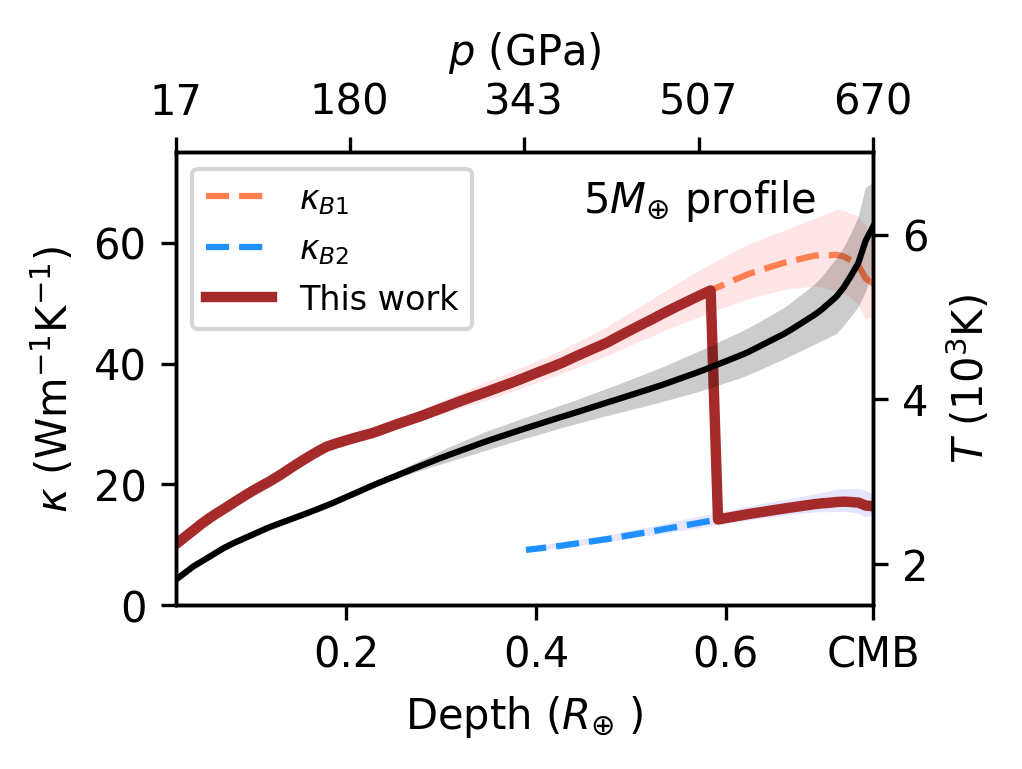

In [5]:
from scipy import interpolate

def _obtain_uniform(data, x):
    f = interpolate.interp1d(data[:,0],data[:,1],kind='slinear')
    return f(x)


def _estimate_trans(press):
    
    data = np.loadtxt(comp_dir+'/B1-B2.txt')
    n = 3
    fit = np.polyfit(data[:,0], data[:,1]*1e3, n )
    trans = np.poly1d(fit)
    
    return trans(press)

R = 6371
r_max = 1.55
depth =  np.linspace(0, r_max, 200)

cri = depth >= (r_max - 0.76)
depth = depth[cri]
p_depth   =  _obtain_uniform(np.loadtxt(comp_dir + '5mass_p.txt'), depth)
t_depth_t   =  _obtain_uniform(np.loadtxt(comp_dir + '5mass_t_reci.txt'), depth)
t_depth_b   =  _obtain_uniform(np.loadtxt(comp_dir + '5mass_t_gen.txt'), depth)

t_depth   = (t_depth_t + t_depth_b)/2

kappa_depth_b1 = prac_formula((p_depth, t_depth),*p_est)
kappa_depth_b1_t = prac_formula((p_depth, t_depth_t),*p_est)
kappa_depth_b1_b = prac_formula((p_depth, t_depth_b),*p_est)


kappa_depth_b2 = prac_formula_b2((p_depth, t_depth),*p_est2)
kappa_depth_b2_t = prac_formula_b2((p_depth, t_depth_t),*p_est2)
kappa_depth_b2_b = prac_formula_b2((p_depth, t_depth_b),*p_est2)
    

kappa_depth = np.array(kappa_depth_b1)
cri = t_depth > _estimate_trans(p_depth)
kappa_depth[cri] = kappa_depth_b2[cri]

fig, ax = plt.subplots(figsize=(3,2),dpi=300)

INIT = -100
ax.plot( r_max - depth[INIT:], kappa_depth_b1[INIT:], '--', color='coral', 
        lw=1.5, label='$\kappa_{B1}$')

ax.fill_between(r_max - depth[INIT:] ,kappa_depth_b1_b[INIT:],  kappa_depth_b1_t[INIT:], 
                facecolor='r', alpha=0.1)

END = -50
ax.plot( r_max - depth[:END], kappa_depth_b2[:END], '--', color='dodgerblue', 
        lw=1.5, label='$\kappa_{B2}$')

ax.fill_between(r_max - depth[:END] ,kappa_depth_b2_b[:END],  kappa_depth_b2_t[:END], 
                facecolor='b', alpha=0.1)

ax.plot( r_max - depth, kappa_depth, color='brown', 
         lw=2.5, label='This work')


ax.text(0.45, 65, '$5M_{\oplus}$ profile')

ax1 = ax.twinx()
scale = 1e-3
ax1.plot( r_max - depth, t_depth * scale, '-k' )
ax1.fill_between( r_max - depth, t_depth_t * scale, t_depth_b * scale, facecolor='k',alpha=0.2 )
ax1.set_ylabel('$T$ ($10^3\\rm{K}$)')
ax1.set_ylim(1500 * scale, 7000 * scale)


rmin = 0.02
rmax = 0.755
xx = r_max - depth

pmin = p_depth[xx >= rmin][-1]
pmax = p_depth[xx <= rmax][0]
ax2 = ax1.twiny()
ax2.set_xlim(pmin, pmax)
ax2.set_xticks( np.linspace(pmin, pmax, 5, dtype=int) )
ax2.set_xlabel('$p$ (GPa)')

ax.set_xlim(rmin, rmax)
ax.set_ylim(0, 75)
ax.set_xticks([0.2, 0.4, 0.6, r_max-depth[0]])
ax.set_xticklabels([0.2,0.4,0.6,'CMB'])

ax.legend(fontsize=8)
#ax.set_xlabel('Depth (km)') #$R_{\oplus}$
ax.set_xlabel('Depth ($R_{\oplus}$ )')
ax.set_ylabel('$\kappa\ {\\rm (Wm^{-1}K^{-1})}$')